# Install Module

In [1]:
#!pip install tensorflow Keras numpy pandas imutils scikit-learn matplotlib seaborn flask flask-cors

In [2]:
#!pip install split-folders

# Modelling

## Import Package & Module

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report

## Buka Folder

In [4]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Checking Folder

!ls "drive/My Drive/dataset"

daun  daun.zip	gabung	leaf  leaf.zip	plant  plant.zip


In [6]:
from PIL import Image

sdir = '/content/drive/My Drive/plant'

pathfile=[]
labels=[]
allowed_extensions = ['.jpg', '.jpeg', '.png']

list_class=os.listdir(sdir)
for classes in list_class:
    classpath=os.path.join(sdir,classes)
    if os.path.isdir(classpath):
        file_list=os.listdir(classpath)
        for file in file_list:
            file_path=os.path.join(classpath,file)
            extension = os.path.splitext(file)[1].lower()
            if extension in allowed_extensions:
              try:
                    img = Image.open(file_path)
                    # img = img.resize((224, 224))  # Resize the image to desired size
                    pathfile.append(file_path)
                    labels.append(classes)
              except (OSError, IOError):
                    print("Error opening image:", file_path)
            else:
                print("Unsupported file format:", file_path)

Fseries= pd.Series(pathfile, name='pathfile')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print (df['labels'].value_counts())

Unsupported file format: /content/drive/My Drive/plant/kananga/Copy of Image_79.gif
Unsupported file format: /content/drive/My Drive/plant/kananga/Copy of Image_21.jpe
Unsupported file format: /content/drive/My Drive/plant/kananga/Copy of Image_72.gif
Unsupported file format: /content/drive/My Drive/plant/kananga/Copy of Image_95.gif
Unsupported file format: /content/drive/My Drive/plant/kananga/Copy of Image_39.gif
Unsupported file format: /content/drive/My Drive/plant/kananga/Copy of Image_67.gif
Unsupported file format: /content/drive/My Drive/plant/Bungur Besar/Copy of Image_25.jpe
Unsupported file format: /content/drive/My Drive/plant/Matoa/Copy of Image_121.gif
Unsupported file format: /content/drive/My Drive/plant/Matoa/Copy of Image_137.gif
                                            pathfile   labels
0  /content/drive/My Drive/plant/kananga/Copy of ...  kananga
1  /content/drive/My Drive/plant/kananga/Copy of ...  kananga
2  /content/drive/My Drive/plant/kananga/Copy of ...  k

## Split Dataset

In [7]:
from sklearn.model_selection import train_test_split

train_split = .8
valid_split = .1
dummy_split = valid_split/(1-train_split)

train_dataset_path, dummy_dataset_path= train_test_split(df, test_size=valid_split, stratify=df['labels'], shuffle=True, random_state=123)
test_dataset_path, valid_dataset_path= train_test_split(dummy_dataset_path, test_size=dummy_split, shuffle=True, random_state=123)

print ('train_df length: ', len(train_dataset_path), '  valid_df length: ', len(valid_dataset_path), '  test_df length: ', len(test_dataset_path))


train_df length:  2299   valid_df length:  129   test_df length:  127


In [8]:
train_dataset_path

pathfile        labels
694   /content/drive/My Drive/plant/pingku/Copy of I...        pingku
2213  /content/drive/My Drive/plant/cassia/Copy of I...        cassia
203   /content/drive/My Drive/plant/kananga/Copy of ...       kananga
33    /content/drive/My Drive/plant/kananga/Copy of ...       kananga
1656  /content/drive/My Drive/plant/Matoa/Copy of Im...         Matoa
...                                                 ...           ...
261   /content/drive/My Drive/plant/kananga/Copy of ...       kananga
1611  /content/drive/My Drive/plant/Bungur Besar/Cop...  Bungur Besar
1689  /content/drive/My Drive/plant/Matoa/Copy of Im...         Matoa
1537  /content/drive/My Drive/plant/Bungur Besar/Cop...  Bungur Besar
2296  /content/drive/My Drive/plant/cassia/Copy of I...        cassia

[2299 rows x 2 columns]

In [9]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(#rotation_range=20,
                                  #  horizontal_flip=True,
                                  #  vertical_flip=True,
                                    rescale=1.0/255,
                                  #zoom_range=0.2,
                                  #width_shift_range=0.2,
                                  #height_shift_range=0.2,
                                  # fill_mode='nearest'
                                   )
train_generator = train_datagen.flow_from_dataframe(train_dataset_path,
                                                    x_col='pathfile',
                                                    y_col='labels',
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    color='rgb',
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(#rotation_range=20,
                                        # horizontal_flip=True,
                                        # vertical_flip=True,
                                        rescale=1.0/255,
                                        #zoom_range=0.2,
                                        #width_shift_range=0.2,
                                        #height_shift_range=0.2,
                                        # fill_mode='nearest'
                                        )
validation_generator = validation_datagen.flow_from_dataframe(valid_dataset_path,
                                                              x_col='pathfile',
                                                              y_col='labels',
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                              color='rgb',
                                                             shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_dataframe(test_dataset_path,
                                                  x_col='pathfile',
                                                  y_col='labels',
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 2299 validated image filenames belonging to 5 classes.
Found 129 validated image filenames belonging to 5 classes.
Found 127 validated image filenames belonging to 5 classes.


In [10]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Bungur Besar
1 : Matoa
2 : cassia
3 : kananga
4 : pingku


## Cek Image Dataset

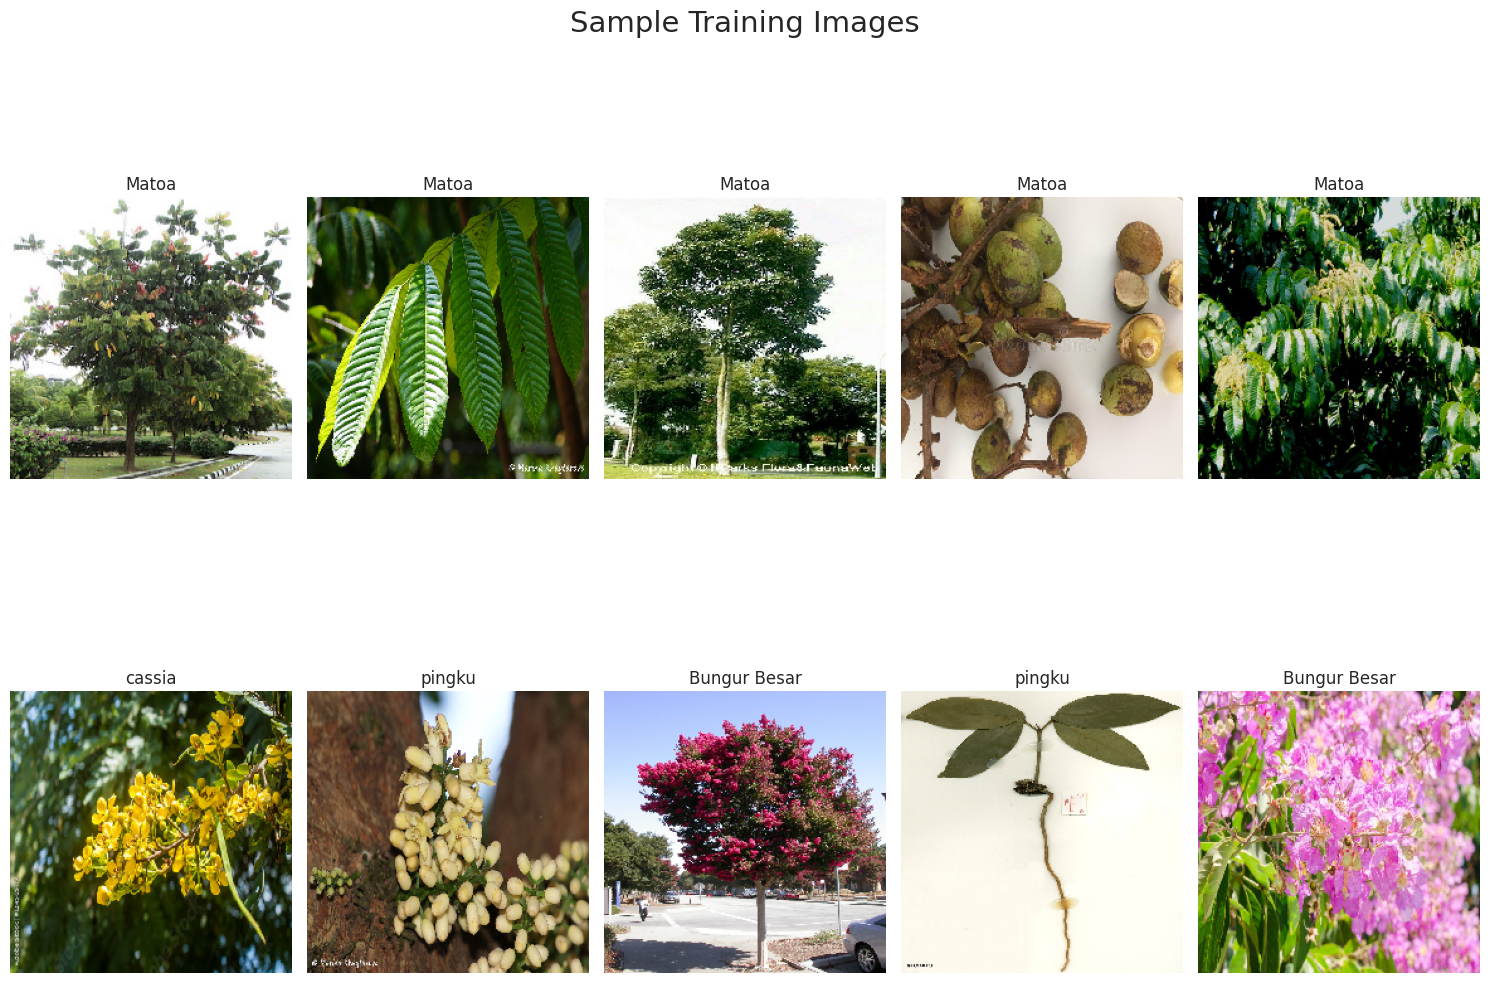

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

## Create Model

In [12]:
# from tf.keras.applications.vgg16 import VGG16
#base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model=tf.keras.applications.Xception(include_top=False, weights="imagenet",input_tensor=Input(shape=(224,224,3)))

83683744/83683744 [==============================] - 5s 0us/step


In [13]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [14]:
base_model.trainable = False

In [15]:
model = tf.keras.Sequential([
            base_model,

            tf.keras.layers.Conv2D(filters=1024, kernel_size=3, padding='same',  activation='relu', strides=1),
            tf.keras.layers.MaxPool2D(pool_size=4),
            tf.keras.layers.Dropout(rate=0.7),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics='accuracy')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 1024)        18875392  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 1024)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 1, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 5)                 5125      
                                                        

In [17]:
epochs =25

history=model.fit(x=train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/25
36/36 [==============================] - 89s 2s/step - loss: 4.9490 - accuracy: 0.5046 - val_loss: 0.9438 - val_accuracy: 0.6667
Epoch 2/25
36/36 [==============================] - 53s 1s/step - loss: 0.8223 - accuracy: 0.7094 - val_loss: 0.7023 - val_accuracy: 0.7209
Epoch 3/25
36/36 [==============================] - 53s 1s/step - loss: 0.6807 - accuracy: 0.7612 - val_loss: 0.6007 - val_accuracy: 0.7907
Epoch 4/25
36/36 [==============================] - 52s 1s/step - loss: 0.5524 - accuracy: 0.8073 - val_loss: 0.5650 - val_accuracy: 0.8140
Epoch 5/25
36/36 [==============================] - 54s 2s/step - loss: 0.4684 - accuracy: 0.8430 - val_loss: 0.5641 - val_accuracy: 0.7829
Epoch 6/25
36/36 [==============================] - 54s 2s/step - loss: 0.4292 - accuracy: 0.8482 - val_loss: 0.5407 - val_accuracy: 0.8217
Epoch 7/25
36/36 [==============================] - 55s 2s/step - loss: 0.3383 - accuracy: 0.8865 - val_loss: 0.6074 - val_accuracy: 0.8062
Epoch 8/25
36/36 [==

## Buat Grafik Training Data

In [18]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

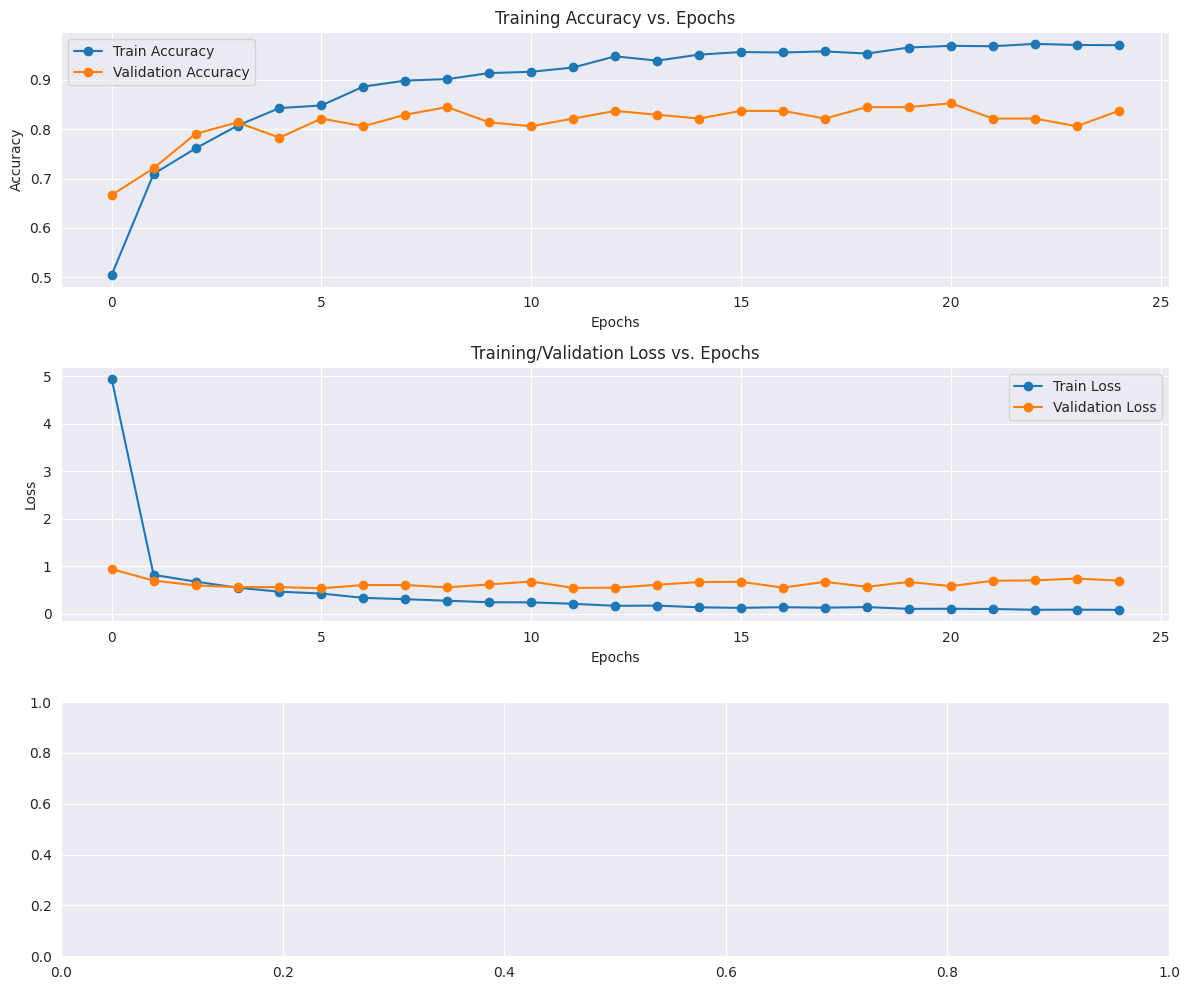

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

## modelling prediction buat test set

In [20]:
predictions = model.predict(test_generator)

2/2 [==============================] - 8s 6s/step


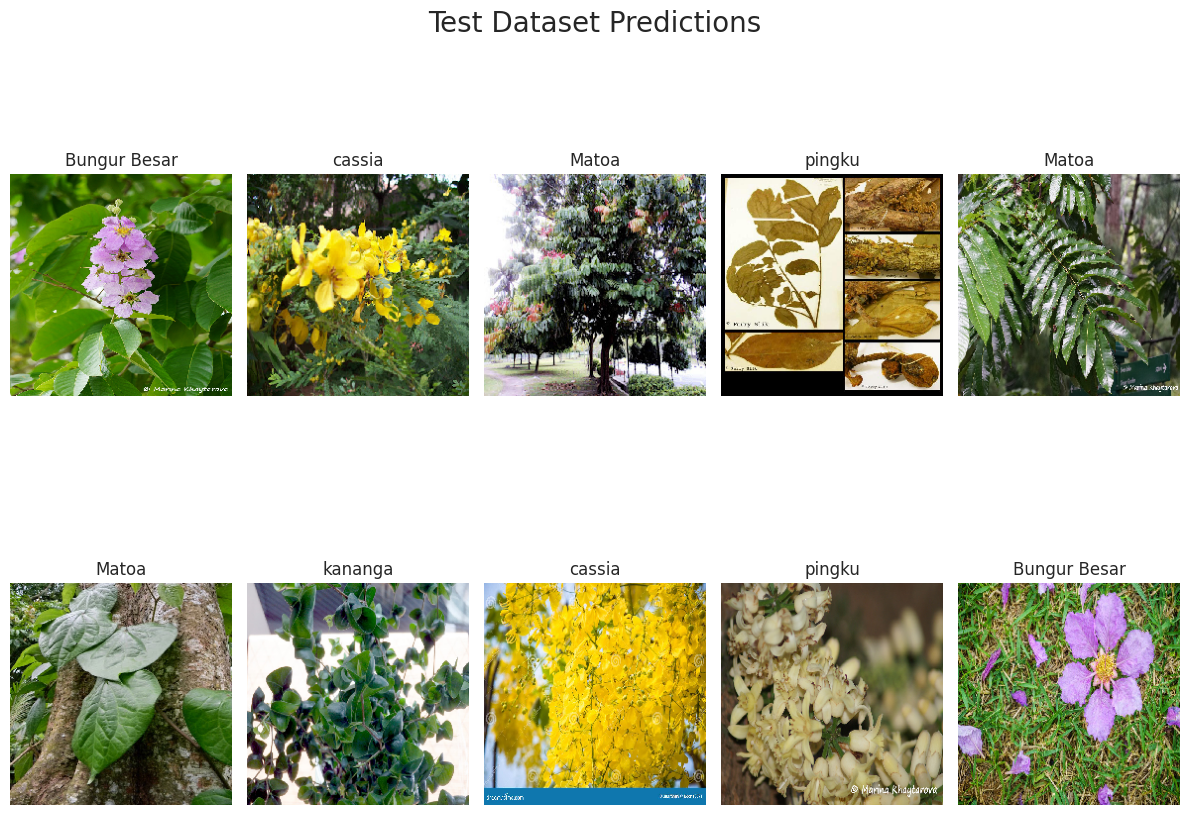

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=BATCH_SIZE)

2/2 [==============================] - 3s 1s/step - loss: 0.5410 - accuracy: 0.8740


In [23]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.5409508347511292
Test Accuracy: 0.874015748500824


## Buat Grafik metrik klasifikasinya

In [24]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

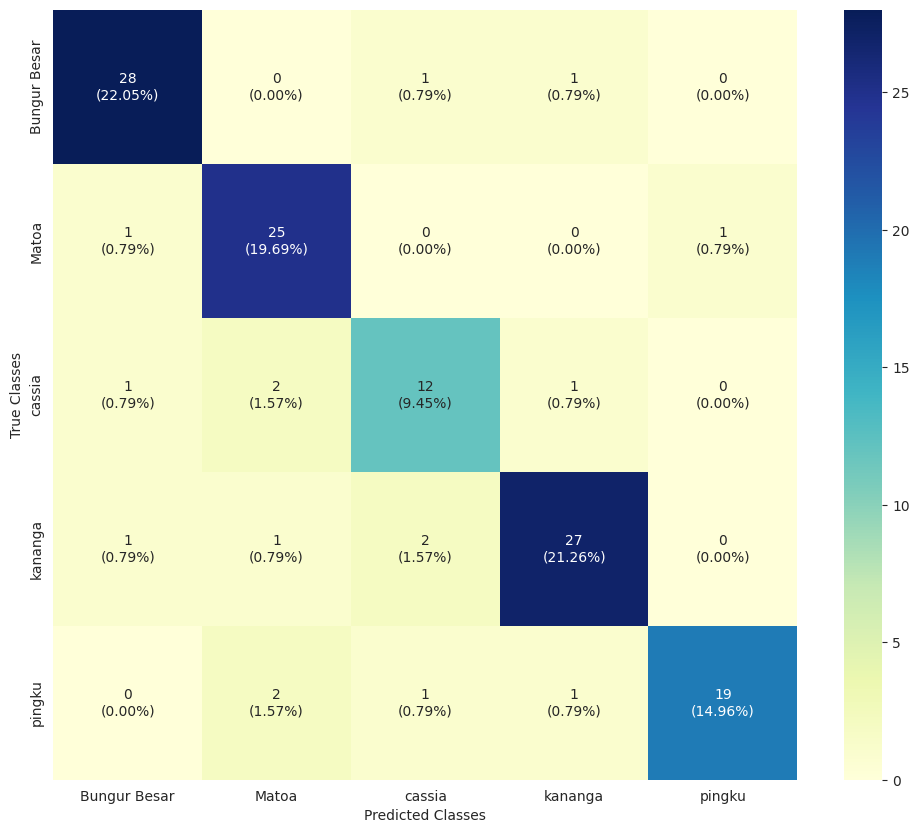

In [25]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(5, 5)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [26]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

Bungur Besar       0.90      0.93      0.92        30
       Matoa       0.83      0.93      0.88        27
      cassia       0.75      0.75      0.75        16
     kananga       0.90      0.87      0.89        31
      pingku       0.95      0.83      0.88        23

    accuracy                           0.87       127
   macro avg       0.87      0.86      0.86       127
weighted avg       0.88      0.87      0.87       127



## prediksi yang salah

In [27]:
import numpy as np

y_true = np.array(y_true)
y_pred = np.array(y_pred)

errors = np.where(y_true != y_pred)[0]
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]


In [28]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

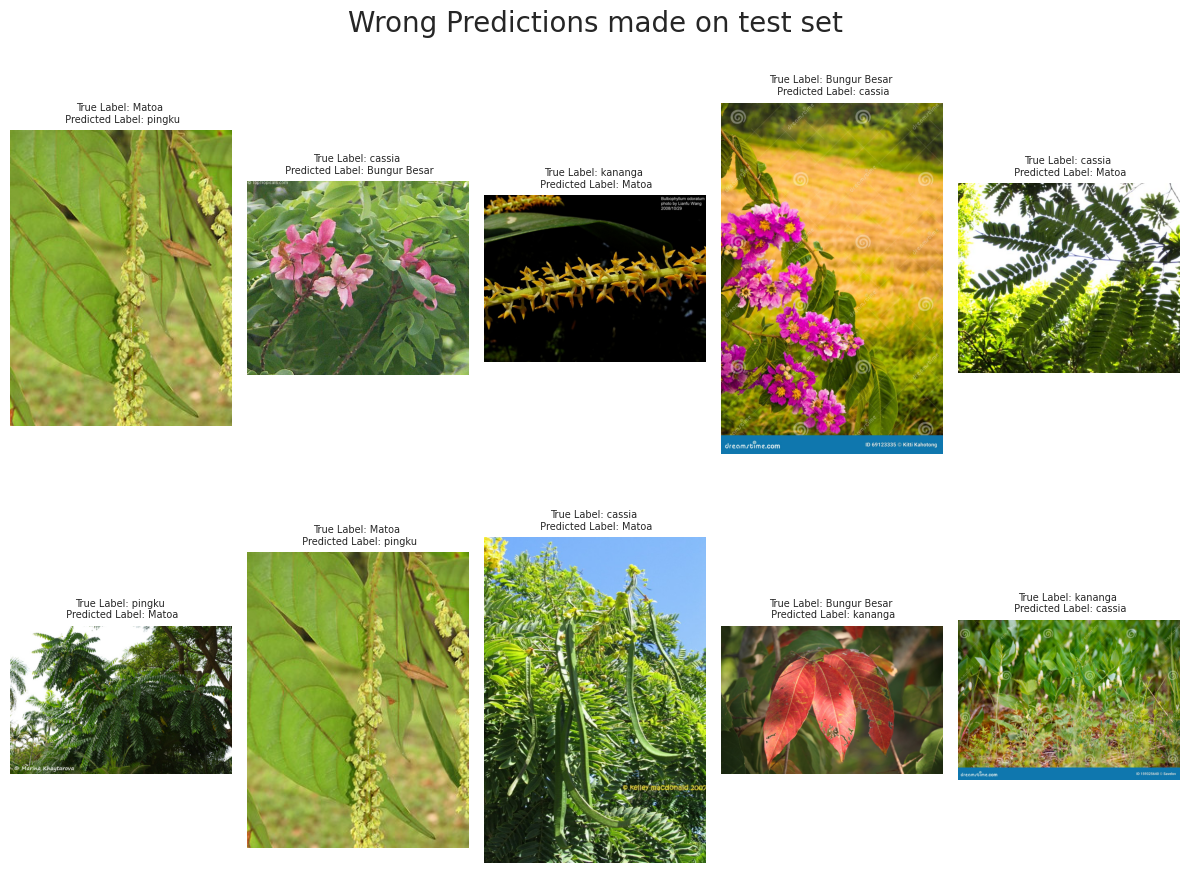

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}", fontsize = 7)
        img_path = os.path.join(test_dataset_path.iloc[idx]['pathfile'], test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

# Save Model

In [ ]:
# Masuk ke direktori yang diinginkan
os.chdir('/content')

# Simpan model ke file .h5
model.save('model_v2.h5')

# Mengunduh model
from google.colab import files
files.download('model_v2.h5')